In [1]:
# packages required

import pandas as pd
import numpy as np
import math
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

# Read the dataset

In [2]:
# Read the dataset abount client summary

client1 = pd.read_csv("../data/CLIENT_191102.tsv", sep="\t")
client1.head()

,EE Provider ID,EE UID,Client Unique ID,Client ID,Client Age at Entry,Client Age at Exit,Client Gender,Client Primary Race,Client Ethnicity,Client Veteran Status
0,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD)
1,Urban Ministries of Durham - Durham County - S...,687902,kdaf01071967k400d635,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD)
2,Urban Ministries of Durham - Durham County - S...,687903,smrf06211973s620m640,188933,42.0,42.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD)
3,Urban Ministries of Durham - Durham County - S...,687904,abrm07251958a416b600,168290,57.0,57.0,Male,White (HUD),Hispanic/Latino (HUD),No (HUD)
4,Urban Ministries of Durham - Durham County - S...,687905,wbom01251964w450b620,123122,51.0,51.0,Male,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD)


In [3]:
# Read another datasets where exact entry and exit dates were recorded

client2 = pd.read_csv("../data/ENTRY_EXIT_191102.tsv", sep="\t", na_values=" ")
client2.head()

,EE Provider ID,EE UID,Client Unique ID,Client ID,Entry Exit Group Id,Entry Exit Household Id,Unnamed: 6,Entry Date,Housing Move-in Date(5584),Exit Date,Destination,Reason for Leaving,Entry Exit Type,Entry Exit Date Added,Entry Exit Date Updated
0,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,NaN,NaN,NaN,8/15/2015,4/20/2015,7/11/2016,"Rental by client, with other ongoing housing s...",Completed program,HUD,8/19/2015,7/20/2016
1,Urban Ministries of Durham - Durham County - S...,687902,kdaf01071967k400d635,130335,NaN,NaN,NaN,8/15/2015,NaN,8/31/2015,Data not collected (HUD),Needs could not be met,HUD,8/19/2015,9/3/2015
2,Urban Ministries of Durham - Durham County - S...,687903,smrf06211973s620m640,188933,NaN,NaN,NaN,8/15/2015,NaN,9/19/2015,"Staying or living with friends, temporary tenu...",Other,HUD,8/19/2015,9/22/2015
3,Urban Ministries of Durham - Durham County - S...,687904,abrm07251958a416b600,168290,NaN,NaN,NaN,8/15/2015,NaN,3/7/2016,Hospital or other residential non-psychiatric ...,Other,HUD,8/19/2015,3/8/2016
4,Urban Ministries of Durham - Durham County - S...,687905,wbom01251964w450b620,123122,NaN,NaN,NaN,8/15/2015,NaN,8/24/2015,"Staying or living with friends, temporary tenu...",Other,HUD,8/19/2015,8/25/2015


In [4]:
# Read dataset about income at entry and exit

income_entry = pd.read_csv("../data/INCOME_ENTRY_191102.tsv", sep="\t", na_values=" ")
income_exit = pd.read_csv("../data/INCOME_EXIT_191102.tsv", sep="\t", na_values=" ")

In [5]:
# Read dataset about insurance at entry and exit

insurance_entry = pd.read_csv("../data/HEALTH_INS_ENTRY_191102.tsv", sep="\t", na_values=" ")
insurance_exit = pd.read_csv("../data/HEALTH_INS_EXIT_191102.tsv", sep="\t", na_values=" ")

In [6]:
# Read dataset about non-cash resources at entry and exit

noncash_entry = pd.read_csv("../data/NONCASH_ENTRY_191102.tsv", sep="\t", na_values=" ")
noncash_exit = pd.read_csv("../data/NONCASH_EXIT_191102.tsv", sep="\t", na_values=" ")

In [7]:
# Read dataset about disabilities at entry and exit

disability_entry = pd.read_csv("../data/DISABILITY_ENTRY_191102.tsv", sep="\t", na_values=" ")
disability_exit = pd.read_csv("../data/DISABILITY_EXIT_191102.tsv", sep="\t", na_values=" ")

# Pre-process the data

In [8]:
# Create another variable to calculate the roughly time spent in the shelter according to their entry and exit ages
# The data is catogorical

a=[]
for x in range(1, client1.shape[0]+1):
    if math.isnan(client1['Client Age at Exit'][x-1] - client1['Client Age at Entry'][x-1]) == True: # na values
        a = a + ['nan']
    else:
        if client1['Client Age at Exit'][x-1] - client1['Client Age at Entry'][x-1] == float(0):
            a = a + ['<1']
        else:
            a = a + [str(int(client1['Client Age at Exit'][x-1] - client1['Client Age at Entry'][x-1])) + '+' ]
client1['Time Spent (year)'] = a

In [9]:
# Create another variable to calculate days spent in the shelter using entry and exit dates

a=[]
for x in range(1,client2.shape[0]+1):
    if type(client2['Exit Date'][x-1]) != str or type(client2['Entry Date'][x-1]) != str: # na values
        a = a + ['nan']
    else:
        a = a + [(datetime.strptime(client2['Exit Date'][x-1], '%m/%d/%Y') - datetime.strptime(client2['Entry Date'][x-1], '%m/%d/%Y')).days]
client2['Time Spent (days)'] = a

In [22]:
# Calculate the total income at entry and exit for each client

income_entry_sum = income_entry.groupby('Client ID').agg({"Monthly Amount (Entry)": "sum"})
income_exit_sum.fillna(0, inplace = True)
income_exit_sum = income_exit.groupby('Client ID').agg({"Monthly Amount (Exit)": "sum"})
income_exit_sum.fillna(0, inplace = True)

In [23]:
# Calculate numbers of insurances each client had at entry and exit

insurance_entry_sum = insurance_entry.groupby('Client ID')['Covered (Entry)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Insurance (Entry)')
insurance_exit_sum = insurance_exit.groupby('Client ID')['Covered (Exit)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Insurance (Exit)')

In [24]:
# Calculate numbers of noncash resources each client had at entry and exit

noncash_entry_sum = noncash_entry.groupby('Client ID')['Receiving Benefit (Entry)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Noncash (Entry)')
noncash_exit_sum = noncash_exit.groupby('Client ID')['Receiving Benefit (Exit)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Noncash (Exit)')

In [25]:
# Calculate numbers of disabilities each client had at entry and exit

disability_entry_sum = disability_entry.groupby('Client ID')['Disability Determination (Entry)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Disability (Entry)')
disability_exit_sum = disability_exit.groupby('Client ID')['Disability Determination (Exit)'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Disability (Exit)')

In [26]:
# Merge the final dataset we will work with

client_v1 = pd.merge(client1, client2[['Client ID', 'Time Spent (days)']], on = ['Client ID'], how = 'left')
client_v2 = pd.merge(client_v1, income_entry_sum, on = ['Client ID'], how = 'left')
client_v3 = pd.merge(client_v2, income_exit_sum, on = ['Client ID'], how = 'left')
client_v4 = pd.merge(client_v3, insurance_entry_sum, on = ['Client ID'], how = 'left')
client_v5 = pd.merge(client_v4, insurance_exit_sum, on = ['Client ID'], how = 'left')
client_v6 = pd.merge(client_v5, noncash_entry_sum, on = ['Client ID'], how = 'left')
client_v7 = pd.merge(client_v6, noncash_exit_sum, on = ['Client ID'], how = 'left')
client_v8 = pd.merge(client_v7, disability_entry_sum, on = ['Client ID'], how = 'left')
client_final = pd.merge(client_v8, disability_exit_sum, on = ['Client ID'], how = 'left')

In [28]:
client_final.head()

,EE Provider ID,EE UID,Client Unique ID,Client ID,Client Age at Entry,Client Age at Exit,Client Gender,Client Primary Race,Client Ethnicity,Client Veteran Status,Time Spent (year),Time Spent (days),Monthly Amount (Entry),Monthly Amount (Exit),Insurance (Entry),Insurance (Exit),Noncash (Entry),Noncash (Exit),Disability (Entry),Disability (Exit)
0,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),1+,331,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
1,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),1+,6,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
2,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),1+,36,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
3,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),1+,66,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
4,Urban Ministries of Durham - Durham County - S...,687902,kdaf01071967k400d635,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),<1,16,4398.0,4398.0,6.0,6.0,0.0,0.0,0.0,0.0


In [29]:
client_final.to_csv('../data/clients_final.tsv', sep = '\t')

# Some summary statistics

In [30]:
# A total summary about number of clients for each catogory

client1.groupby(['EE Provider ID', 'Client Gender', 'Client Primary Race']).count()

EE UID  \
EE Provider ID                                     Client Gender                        Client Primary Race                                       
Urban Ministries of Durham - Durham County - Si... Female                               American Indian or Alaska Native (HUD)               20   
                                                                                        Black or African American (HUD)                     684   
                                                                                        Data not collected (HUD)                              1   
                                                                                        Native Hawaiian or Other Pacific Islander (HUD)       1   
                                                                                        White (HUD)                                         330   
                                                   Male                                 American Indian or Alaska Native (HUD)               54   
                                                                                        Asian (HUD)                                           3   
                                                                                        Black or African American (HUD)                    2440   
                                                                                        Client doesn't know (HUD)                             4   
                                                                                        Client refused (HUD)                                  2   
                                                                                        Data not collected (HUD)                              5   
                                                                                        Native Hawaiian or Other Pacific Islander (HUD)      10   
                                                                                        White (HUD)                                         750   
                                                   Trans Female (MTF or Male to Female) Black or African American (HUD)                       9   
                                                                                        White (HUD)                                           6   
XXXClosed2015 Urban Ministries of Durham- Durha... Female                               American Indian or Alaska Native (HUD)                2   
                                                                                        Black or African American (HUD)                     119   
                                                                                        White (HUD)                                          58   
                                                   Male                                 American Indian or Alaska Native (HUD)               10   
                                                                                        Black or African American (HUD)                     426   
                                                                                        Client refused (HUD)                                  2   
                                                                                        White (HUD)                                          99   
                                                   Trans Female (MTF or Male to Female) Black or African American (HUD)                       1   
                                                                                        White (HUD)                                           1   
XXXClosed2015 Urban Ministries of Durham- Durha... Female                               Black or African American (HUD)                      17   
                                                                                        White (HUD)                                           6   
                     

In [31]:
# Summary about number of clients with each EE provider

client1.groupby(['EE Provider ID']).count()['Client Unique ID']

EE Provider ID
Urban Ministries of Durham - Durham County - Singles Emergency Shelter - Private(5838)    4319
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Entry- ESG(1970)          721
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Forward- ESG(5694)         65
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Outreach- ESG(4515)        51
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Recovery- ESG(1932)        67
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Tech- ESG(4516)            61
XXXClosed2015 Urban Ministries of Durham- Durham County- Journey Veterans- ESG(5069)        15
Name: Client Unique ID, dtype: int64

In [32]:
# Summary about number of clients with each gender

client1.groupby(['Client Gender']).count()['Client Unique ID']

Client Gender
Female                                  1290
Male                                    3989
Trans Female (MTF or Male to Female)      17
Name: Client Unique ID, dtype: int64

In [33]:
# Summary about number of clients with each race

client1.groupby(['Client Primary Race']).count()['Client Unique ID']

Client Primary Race
American Indian or Alaska Native (HUD)               90
Asian (HUD)                                           3
Black or African American (HUD)                    3864
Client doesn't know (HUD)                             4
Client refused (HUD)                                  5
Data not collected (HUD)                              6
Native Hawaiian or Other Pacific Islander (HUD)      11
White (HUD)                                        1313
Name: Client Unique ID, dtype: int64

In [34]:
# Summary about number of clients with each ethnicity

client1.groupby(['Client Ethnicity']).count()['Client Unique ID']

Client Ethnicity
Client doesn't know (HUD)          10
Client refused (HUD)                8
Data not collected (HUD)           13
Hispanic/Latino (HUD)             192
Non-Hispanic/Non-Latino (HUD)    5073
Name: Client Unique ID, dtype: int64

In [35]:
# Summary about number of clients with veteran status

client1.groupby(['Client Veteran Status']).count()['Client Unique ID']

Client Veteran Status
Data not collected (HUD)       7
No (HUD)                    4724
Yes (HUD)                    558
Name: Client Unique ID, dtype: int64

In [36]:
# Summary about time spent catogory for each client 

client1.groupby(['Time Spent (year)']).count()['Client Unique ID']

Time Spent (year)
1+      560
2+        7
<1     4729
nan       3
Name: Client Unique ID, dtype: int64

In [37]:
# Reasons that people left

client2.groupby(['Destination']).count()['Client ID'].sort_values(ascending = False)

Destination
Staying or living with friends, temporary tenure (HUD)                                                1443
No exit interview completed (HUD)                                                                      985
Staying or living with family, temporary tenure (HUD)                                                  840
Data not collected (HUD)                                                                               313
Rental by client, no ongoing housing subsidy (HUD)                                                     292
Other (HUD)                                                                                            278
Staying or living with family, permanent tenure (HUD)                                                  166
Hospital or other residential non-psychiatric medical facility (HUD)                                   164
Rental by client, with other ongoing housing subsidy (HUD)                                             157
Place not meant for habit

# Specific analysis to individual client

### Who came most often

In [38]:
# Groupby client ID and then count the numbers of each group

client_freq = client1.groupby(['Client ID']).count()['Client Unique ID'].sort_values(ascending = False)
client_freq.head()

Client ID
320781    37
344697    36
2054      22
419124    18
346065    18
Name: Client Unique ID, dtype: int64

### Who stayed the longest

In [39]:
# Find non-NA's in the 'Time Spent (days)' column and then sort the values

a = list()
for x in range(0,client2.shape[0]):
    if type(client2['Time Spent (days)'][x])==int:
        a = a + [x] # find non-NA's
client_stay = client2.iloc[a].sort_values(by = ['Time Spent (days)'], ascending = False)[['Client ID','Time Spent (days)']]
client_stay.head()

,Client ID,Time Spent (days)
5105,231922,894
2200,10107,574
2199,224787,550
3017,318721,515
2992,318722,515


# Relationship between staying days and other factors

In [40]:
# Fit a regression model to decide which variables are significant to staying days
# The explanotory variables are: age at Entry, gender, race, veteran status, income at entry, insurance at entry, 
#   non cash services at entry, disabilities at entry

# Drop all the NA values
final_nona = client_final[['Time Spent (days)', 'Client Age at Entry', 'Client Gender', 'Client Primary Race', 
                                'Client Veteran Status', 'Monthly Amount (Entry)','Insurance (Entry)', 
                           'Noncash (Entry)', 'Disability (Entry)']].dropna()

In [41]:
# Create dummy variables and replace string with the values
# For gender:
final_nona.loc[final_nona['Client Gender'] == 'Female', 'Client Gender'] = 0
final_nona.loc[final_nona['Client Gender'] == 'Male', 'Client Gender'] = 1
final_nona.loc[final_nona['Client Gender'] == 'Trans Female (MTF or Male to Female)', 'Client Gender'] = 0.5

In [42]:
# For race:
# The main races are white and black, and the numbers of other races are very small. 
# Other races are in one group.
# Create 2 dummy variables for race.

final_nona['Client Primary Race2'] = 0

final_nona.loc[final_nona['Client Primary Race'] == 'White (HUD)', 'Client Primary Race2'] = 0
final_nona.loc[final_nona['Client Primary Race'] == 'White (HUD)', 'Client Primary Race'] = 0

final_nona.loc[final_nona['Client Primary Race'] == 'Black or African American (HUD)', 'Client Primary Race2'] = 1
final_nona.loc[final_nona['Client Primary Race'] == 'Black or African American (HUD)', 'Client Primary Race'] = 0

final_nona.loc[final_nona['Client Primary Race'] != 0, 'Client Primary Race2'] = 0
final_nona.loc[final_nona['Client Primary Race'] != 0, 'Client Primary Race'] = 1

In [43]:
# For veteran status:
final_nona.loc[final_nona['Client Veteran Status'] == 'No (HUD)', 'Client Veteran Status'] = 0
final_nona.loc[final_nona['Client Veteran Status'] == 'Yes (HUD)', 'Client Veteran Status'] = 1
final_nona.drop(final_nona[final_nona['Client Veteran Status'] == 'Data not collected (HUD)'].index, inplace = True) 

In [44]:
# Replace INF to NA and then drop NA
final_nona = final_nona.apply(pd.to_numeric, args=('coerce',))
final_nona.replace([np.inf, -np.inf], np.nan)
final_nona.dropna(inplace = True)
final_nona.head()

,Time Spent (days),Client Age at Entry,Client Gender,Client Primary Race,Client Veteran Status,Monthly Amount (Entry),Insurance (Entry),Noncash (Entry),Disability (Entry),Client Primary Race2
0,331.0,60.0,0.0,0,0,0.0,0.0,4.0,0.0,0
1,6.0,60.0,0.0,0,0,0.0,0.0,4.0,0.0,0
2,36.0,60.0,0.0,0,0,0.0,0.0,4.0,0.0,0
3,66.0,60.0,0.0,0,0,0.0,0.0,4.0,0.0,0
4,16.0,48.0,0.0,0,0,4398.0,6.0,0.0,0.0,1


In [45]:
# Choose variables by calculating the pearson correlation matrix
correlation = final_nona.corr(method='pearson')
columns = correlation.nlargest(7, 'Time Spent (days)').index
columns

Index(['Time Spent (days)', 'Client Age at Entry', 'Noncash (Entry)',
       'Client Primary Race2', 'Client Primary Race', 'Client Veteran Status',
       'Client Gender'],
      dtype='object')

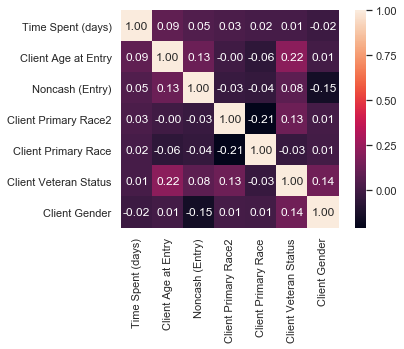

In [46]:
# Plot the pearson correlation matrix
correlation_map = np.corrcoef(final_nona[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

figure = heatmap.get_figure()    
figure.savefig('../results/heatmap.png', dpi=400)

In [47]:
# Specify our x and y
X = final_nona[['Client Age at Entry', 'Noncash (Entry)',
       'Client Primary Race2', 'Client Primary Race', 'Client Veteran Status',
                'Client Gender']]
Y = final_nona['Time Spent (days)']

In [48]:
# Train linear regression model
model_LR = sm.OLS(Y, X).fit()
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Time Spent (days)   R-squared (uncentered):                   0.277
Model:                            OLS   Adj. R-squared (uncentered):              0.277
Method:                 Least Squares   F-statistic:                              1608.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:08:47   Log-Likelihood:                     -1.3446e+05
No. Observations:               25133   AIC:                                  2.689e+05
Df Residuals:                   25127   BIC:                                  2.690e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Client Age at Entry       0.5455      0.017     32.931      0.000       0.513       0.578
Noncash (Entry)           0.4780      0.073      6.562      0.000       0.335       0.621
Client Primary Race2      6.2495      0.678      9.217      0.000       4.921       7.578
Client Primary Race      14.5948      2.491      5.859      0.000       9.712      19.478
Client Veteran Status    -3.7248      1.190     -3.129      0.002      -6.058      -1.392
Client Gender             0.8583      0.728      1.179      0.238      -0.569       2.285
==============================================================================
Omnibus:                    19411.117   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430140.399
Skew:                           3.610   Prob(JB):                         0.00
Kurtosis:                      21.937   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Creat variables to compare changes

In [49]:
# Create another dataframe

client_diff = client_final.drop(columns=['EE Provider ID', 'Client Unique ID', 'Client Gender',
                                         'Client Primary Race', 'Client Ethnicity', 
                                         'Client Veteran Status','Time Spent (year)'])

# Create variabeles recording the difference between exit and entry

client_diff['Income diff'] = client_diff['Monthly Amount (Exit)'] - client_diff['Monthly Amount (Entry)']
client_diff['Insurance diff'] = client_diff['Insurance (Exit)'] - client_diff['Insurance (Entry)']
client_diff['Noncash diff'] = client_diff['Noncash (Exit)'] - client_diff['Noncash (Entry)']
client_diff['Disability diff'] = client_diff['Disability (Exit)'] - client_diff['Disability (Entry)']


In [50]:
# Create a weighted score represents whether client's life was improved at exit
# Variables: Income diff, Insurance diff, Noncash diff, Disability diff
# Formula: 0.0004*Income diff + 0.4*Insurance diff + 0.4*Noncash diff - 0.2*Disability diff

client_diff['Score'] = 0.0004*client_diff['Income diff'] + 0.4*client_diff['Insurance diff'] + 0.4*client_diff['Noncash diff'] - 0.2*client_diff['Disability diff']

In [51]:
client_diff.to_csv('../data/clients_diff.tsv', sep = '\t')

In [52]:
# Analyze how many clients had improved
client_diff[client_diff['Score'] > 0].count()[1]

5690

In [53]:
# Mean scores for all the clients
client_diff['Score'].mean()

0.0987679690421947

TypeError: 'tuple' object is not callable